In [77]:
import networkx as nx
G = nx.karate_club_graph()

In [78]:
import matplotlib.pyplot as plt
import numpy as np

### Degree Distribution

In [79]:
degrees = dict(G.degree())
print(degrees)

{0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17}


In [80]:
degree_values = sorted(set(degrees.values()))
print(degree_values)

[1, 2, 3, 4, 5, 6, 9, 10, 12, 16, 17]


In [81]:
heights = []

for degree in degree_values:
    # num of nodes with this degree value
    node_count = list(degrees.values()).count(degree)
        
    heights.append(node_count)
    
print(heights)

[1, 11, 6, 6, 3, 2, 1, 1, 1, 1, 1]


Text(0, 0.5, 'Num of Nodes')

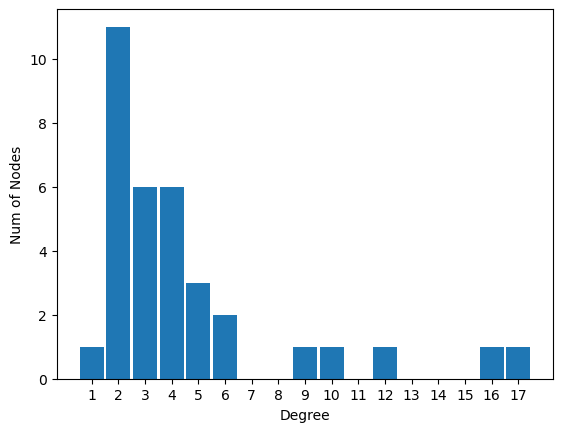

In [82]:
plt.bar(degree_values, heights, width = 0.9)
plt.xticks(np.arange(1, 18));
plt.xlabel('Degree')
plt.ylabel('Num of Nodes')

### Preferential Attachment Model
New nodes are more likely to connect with an edge to nodes with more edges

```nx.barabasi_albert_graph(n,m)``` where n is a network with n nodes and each new node randomly attaches to m existed nodes via preferential attachment

In [83]:
G = nx.barabasi_albert_graph(1000000,1)

In [84]:
degrees = dict(G.degree())

In [85]:
degree_values = sorted(set(degrees.values()))

In [89]:
heights = []
for degree in degree_values:
    node_count = list(degrees.values()).count(degree)
    heights.append(node_count)
heights = [height / nx.number_of_nodes(G) for height in heights]

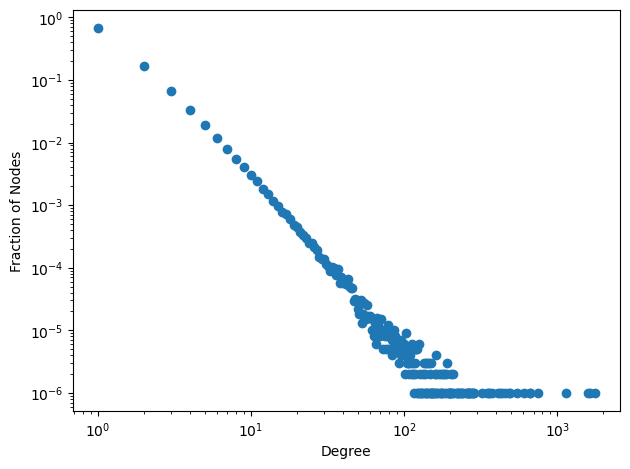

In [97]:
plt.plot(degree_values, heights, 'o')
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()

### Small World Model
Start with ring of $n$ nodes where each node is connected to $k$ nearest neighbors\
Probability $p$ that each edge is rewired from $(u, v)$ to $(u, w)$

Achieves high clustering coefficient _(which is not achieved through preferential attachment)_ and low average shortest path\
```nx.watts_strogatz_graph(n, k, p)```\
```nx.connected_watts_strogatz_graph(n, k, p, t)``` This makes sure it is connected wth up to $t$ reruns\
```nx.newman_watts_strogatz_graph(n, k, p)``` Alternative where instead of rewiring edges, new edges added with probability $p$

In [100]:
G = nx.watts_strogatz_graph(1000, 6, 0.04)

In [101]:
degrees = dict(G.degree())

In [102]:
degree_values = sorted(set(degrees.values()))

In [105]:
heights = []
for degree in degree_values:
    height = list(degrees.values()).count(degree)
    heights.append(height)
heights = [height / nx.number_of_nodes(G) for height in heights]

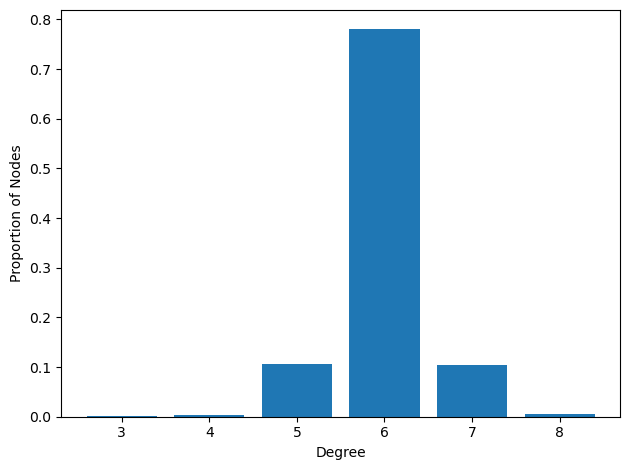

In [109]:
plt.bar(degree_values, heights)
plt.xlabel('Degree')
plt.ylabel('Proportion of Nodes')
plt.tight_layout()

### Link Prediction
Given a network, can we predict which edges will form in future?G = nx.karate_club_graph()


In [135]:
G = nx.karate_club_graph()
import operator

In [136]:
# Common Neighbors
comm_neigh = [(edge[0], edge[1], len(list(nx.common_neighbors(G, edge[0], edge[1])))) for edge in nx.non_edges(G)]
print(sorted(comm_neigh[:5], key = operator.itemgetter(2), reverse=True)) # (node1, node1, num neighbors)

[(0, 33, 4), (0, 32, 3), (0, 9, 1), (0, 14, 0), (0, 15, 0)]


In [137]:
# Jaccard Coefficient - same as common neighbors but normalized by total number of neighbors
L = list(nx.jaccard_coefficient(G))
print(sorted(L[:5], key = operator.itemgetter(2), reverse=True)) # (node1, node1, num neighbors)

[(0, 33, 0.13793103448275862), (0, 32, 0.12), (0, 9, 0.058823529411764705), (0, 14, 0.0), (0, 15, 0.0)]


In [139]:
# Research Allocation Index
L = list(nx.resource_allocation_index(G))
print(sorted(L[:5], key = operator.itemgetter(2), reverse=True)) # (node1, node1, num neighbors)

[(0, 33, 0.9), (0, 32, 0.4666666666666667), (0, 9, 0.1), (0, 14, 0), (0, 15, 0)]


In [140]:
# Adamic-Adar Index
L = list(nx.adamic_adar_index(G))
print(sorted(L[:5], key = operator.itemgetter(2), reverse=True)) # (node1, node1, num neighbors)

[(0, 33, 2.7110197222973085), (0, 32, 1.613740043014111), (0, 9, 0.43429448190325176), (0, 14, 0), (0, 15, 0)]


In [142]:
# Preferential Attachment Score
L = list(nx.preferential_attachment(G))
print(sorted(L[:5], key = operator.itemgetter(2), reverse=True)) # (node1, node1, num neighbors)

[(0, 33, 272), (0, 32, 192), (0, 9, 32), (0, 14, 32), (0, 15, 32)]


In [156]:
# Commmon Nieghboy Soundarajan-Hopcroft score - adds bonus for nodes in same 'community'
for i in range(0, 16):
    G.nodes[i]['community'] = 0
for i in range(16, 34):
    G.nodes[i]['community'] = 1
print(list(G.nodes(data=True))[:5])

[(0, {'club': 'Mr. Hi', 'community': 0}), (1, {'club': 'Mr. Hi', 'community': 0}), (2, {'club': 'Mr. Hi', 'community': 0}), (3, {'club': 'Mr. Hi', 'community': 0}), (4, {'club': 'Mr. Hi', 'community': 0})]


In [157]:
L = list(nx.cn_soundarajan_hopcroft(G))
print(sorted(L[:5], key = operator.itemgetter(2), reverse=True)) # (node1, node1, num neighbors)

[(0, 33, 4), (0, 32, 3), (0, 9, 2), (0, 14, 0), (0, 15, 0)]


In [155]:
# Resource Allocation Soundarajan-Hopcroft score - neighbor that is not in same community contributes zero
L = list(nx.ra_index_soundarajan_hopcroft(G))
print(sorted(L[:5], key = operator.itemgetter(2), reverse=True)) # (node1, node1, num neighbors)

[(0, 9, 0.1), (0, 32, 0), (0, 33, 0), (0, 14, 0), (0, 15, 0)]
